In [20]:
import math
import torch.nn as nn
import torch
from collections import OrderedDict
import matplotlib.pyplot as plt

# Data

In [4]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

#6.1

In [ ]:
math.tanh(-2.2)

-0.9757431300314515

In [ ]:
math.tanh(0.1)

0.09966799462495582

In [ ]:
math.tanh(2.5)

0.9866142981514303

#6.2

In [ ]:
linear_model = nn.Linear(1, 1)
linear_model(val_t_un.reshape(2, 1))

tensor([[0.7682],
        [0.4601]], grad_fn=<AddmmBackward0>)

In [ ]:
linear_model.weight

Parameter containing:
tensor([[0.0661]], requires_grad=True)

In [ ]:
linear_model.bias

Parameter containing:
tensor([0.3160], requires_grad=True)

In [ ]:
x = torch.ones(1)
linear_model(x)

tensor([0.3821], grad_fn=<AddBackward0>)

In [ ]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.3821],
        [0.3821],
        [0.3821],
        [0.3821],
        [0.3821],
        [0.3821],
        [0.3821],
        [0.3821],
        [0.3821],
        [0.3821]], grad_fn=<AddmmBackward0>)

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear_model.parameters(),
                            lr=1e-2)

In [16]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u)
        loss_train = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u)
        loss_val = loss_fn(train_t_p, train_t_c)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epoch {epoch}, Training loss {loss_train.item():.4f},',
                  f' Validation loss {loss_val.item():.4f}')

In [ ]:
from torch import optim
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)
training_loop(n_epochs=3000,
              optimizer=optimizer,
              model=linear_model,
              loss_fn=nn.MSELoss(),
              train_t_u=train_t_un.unsqueeze(1),
              val_t_u=val_t_un.unsqueeze(1),
              train_t_c=train_t_c.unsqueeze(1),
              val_t_c=val_t_c.unsqueeze(1))
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 171.7546,  Validation loss 171.7546
Epoch 1000, Training loss 4.7151,  Validation loss 4.7151
Epoch 2000, Training loss 3.0198,  Validation loss 3.0198
Epoch 3000, Training loss 2.8561,  Validation loss 2.8561
Parameter containing:
tensor([[5.4341]], requires_grad=True)
Parameter containing:
tensor([-17.9821], requires_grad=True)


#6.3

In [5]:
seq_model = nn.Sequential(nn.Linear(1, 13),
                          nn.Tanh(),
                          nn.Linear(13, 1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [6]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [7]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [11]:
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 13)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(13, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=13, out_features=1, bias=True)
)

In [12]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([13, 1])
hidden_linear.bias torch.Size([13])
output_linear.weight torch.Size([1, 13])
output_linear.bias torch.Size([1])


In [13]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.0853], requires_grad=True)

In [19]:
optimizer = torch.optim.SGD(seq_model.parameters(), lr=1e-2)
training_loop(n_epochs=5000,
              optimizer=optimizer,
              model=seq_model,
              loss_fn=nn.MSELoss(),
              train_t_u=train_t_un.unsqueeze(1),
              val_t_u=val_t_un.unsqueeze(1),
              train_t_c=train_t_c.unsqueeze(1),
              val_t_c=val_t_c.unsqueeze(1))

print('output', seq_model(val_t_un.unsqueeze(1)))
print('answer', val_t_c)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.6707,  Validation loss 1.6707
Epoch 1000, Training loss 1.4997,  Validation loss 1.4997
Epoch 2000, Training loss 1.3738,  Validation loss 1.3738
Epoch 3000, Training loss 1.2830,  Validation loss 1.2830
Epoch 4000, Training loss 1.2143,  Validation loss 1.2143
Epoch 5000, Training loss 1.1595,  Validation loss 1.1595
output tensor([[13.2779],
        [24.6471]], grad_fn=<AddmmBackward0>)
answer tensor([11., 28.])
hidden tensor([[-1.0210e+00],
        [-1.4964e+00],
        [-9.1738e-01],
        [-5.8735e+00],
        [ 1.1028e-02],
        [-1.6322e-01],
        [-1.2085e+00],
        [-1.5339e-02],
        [-1.9634e-02],
        [-3.8890e-03],
        [-1.5707e-02],
        [ 2.7649e-03],
        [ 3.5224e-03]])


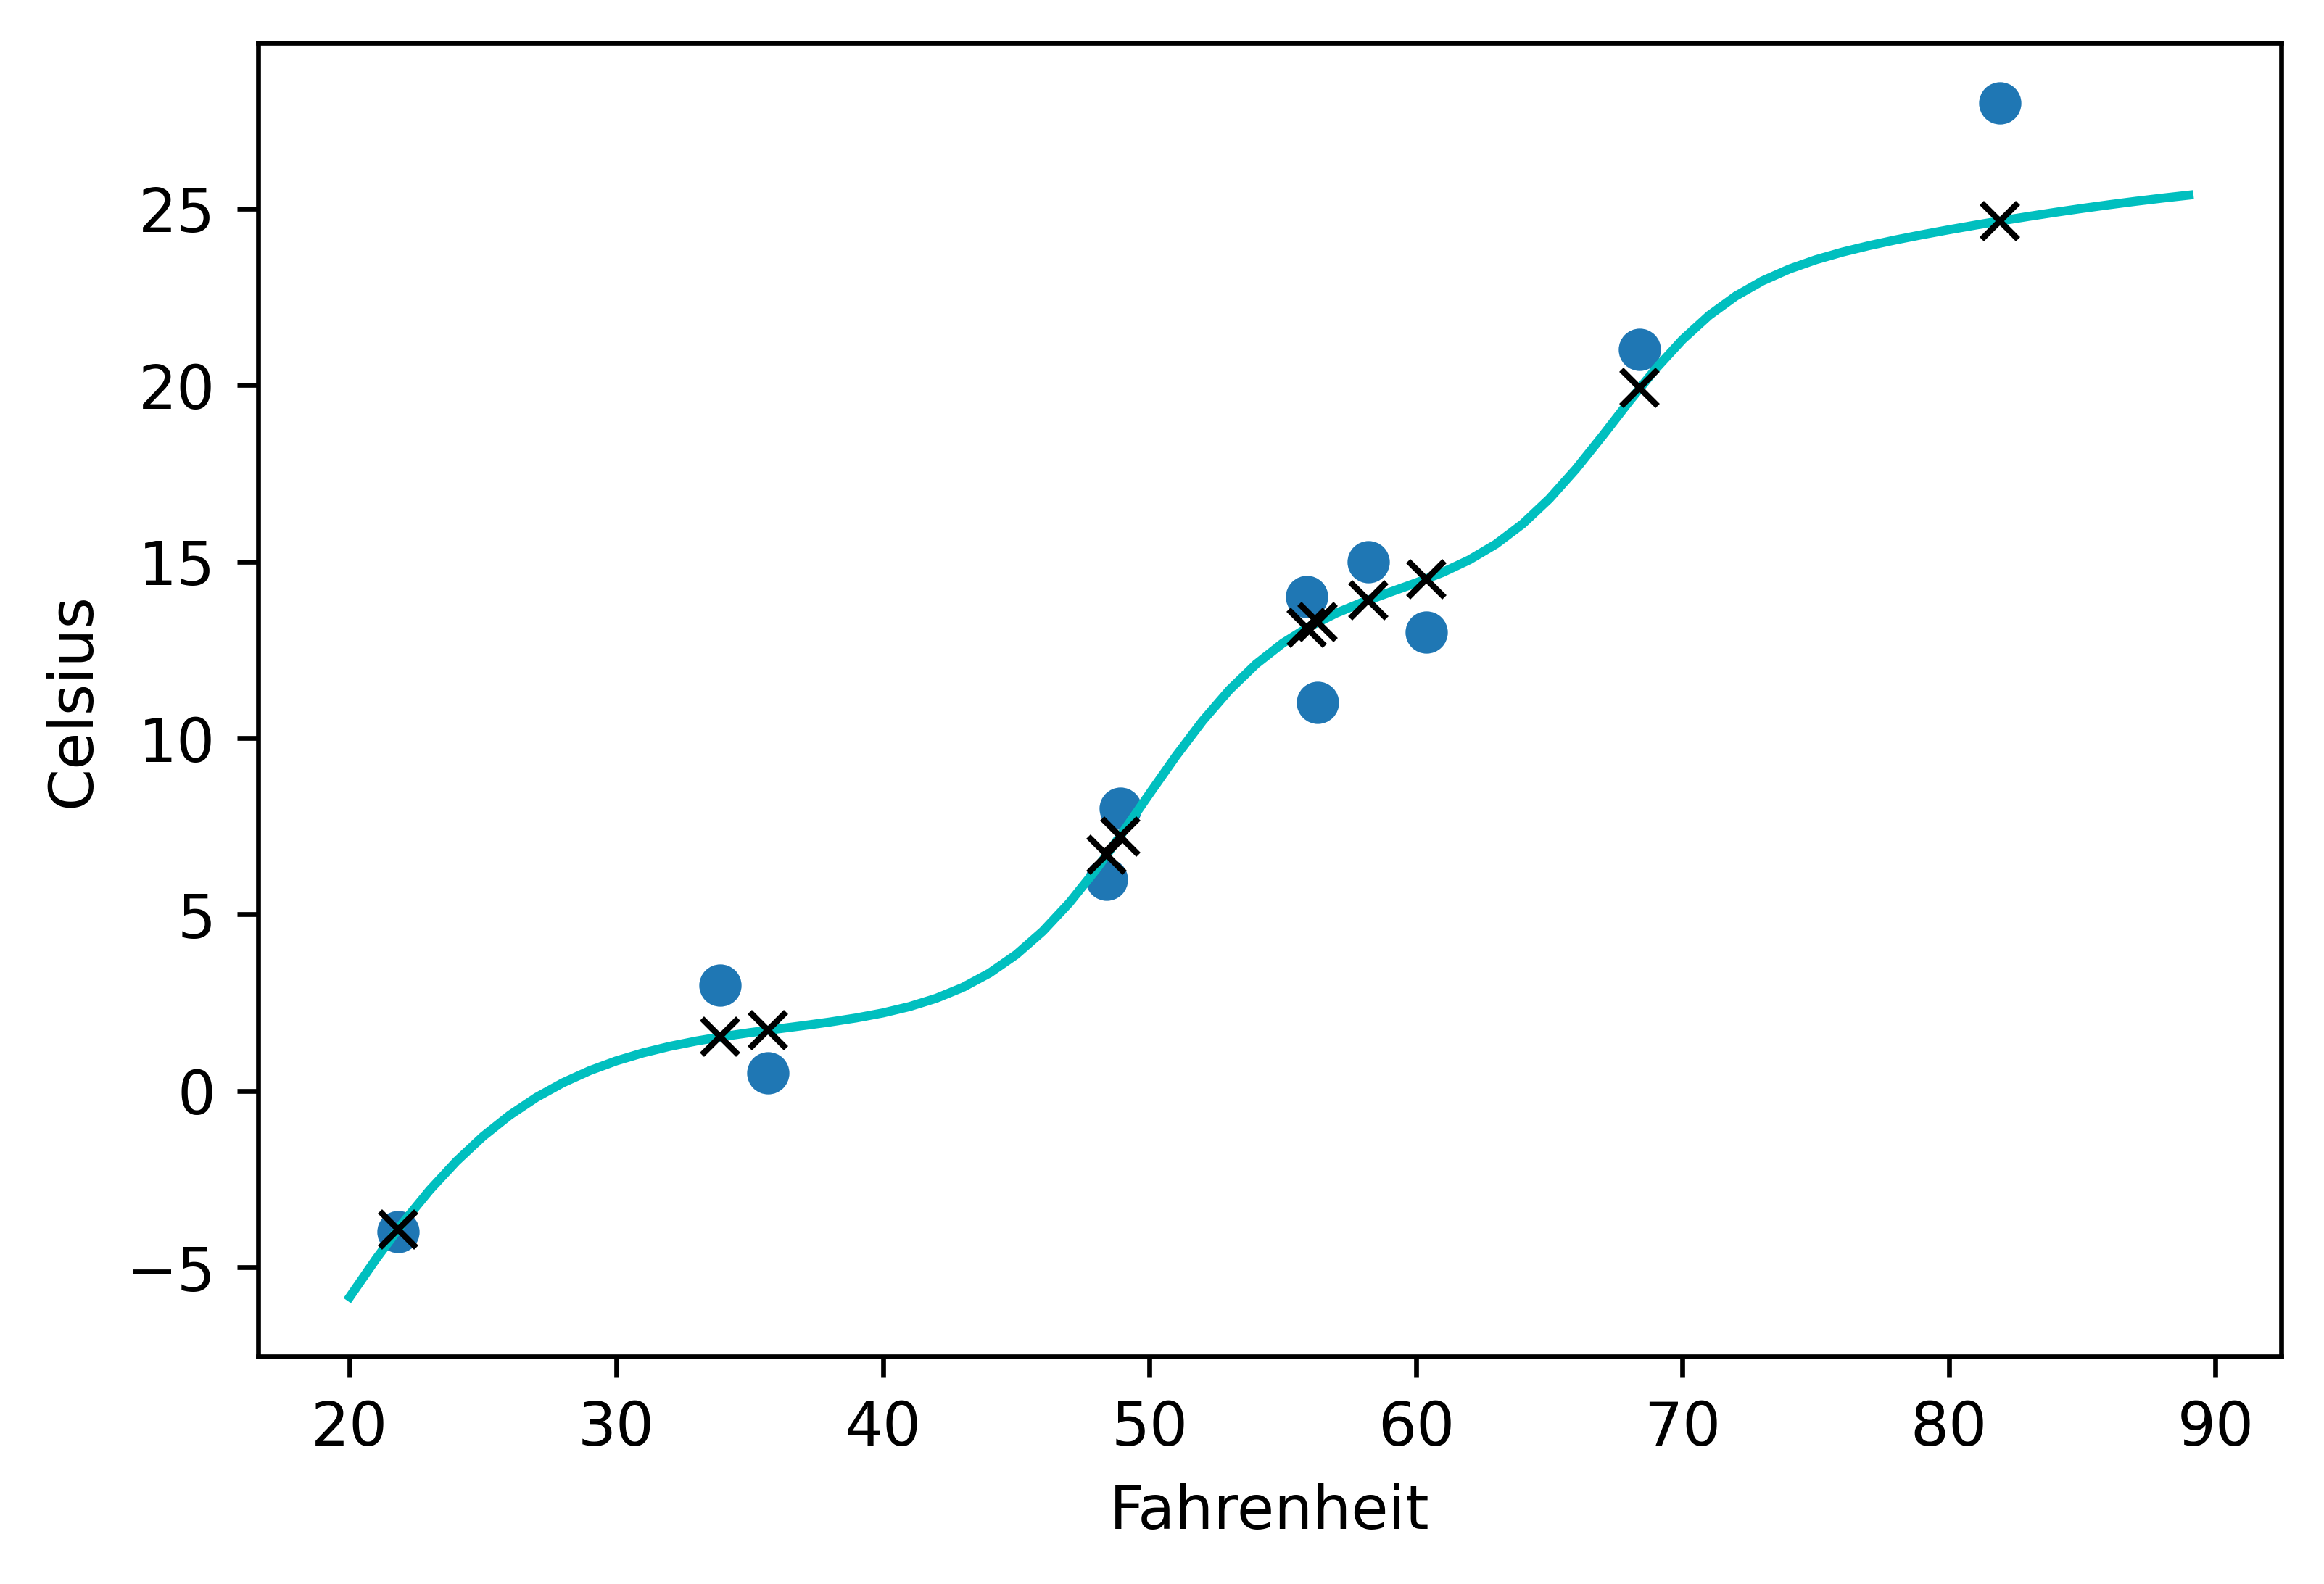

In [22]:
t_range=torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u.unsqueeze(1)).detach().numpy(), 'kx')